## Import Library yang digunakan

In [1]:
!pip install scikit-optimize
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import nltk
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
smote = SMOTE()
data = pd.read_csv('https://raw.githubusercontent.com/haikal-here/gplay_comment_nlp/refs/heads/main/Dataset%20(1).csv')
data = data.dropna().reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11868 entries, 0 to 11867
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            11868 non-null  int64 
 1   Review Date      11868 non-null  object
 2   Ratings          11868 non-null  int64 
 3   Comment          11868 non-null  object
 4   Comment Cleaned  11868 non-null  object
 5   Label            11868 non-null  object
dtypes: int64(2), object(4)
memory usage: 556.4+ KB


In [5]:
X = tfidf.fit_transform(data["Comment Cleaned"]).toarray()
y = data["Label"]

X.shape, y.shape

((11868, 5000), (11868,))

## Model Random Forest

In [6]:
# Train Model
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_rf, y_train_rf = smote.fit_resample(X_train_rf, y_train_rf)
rf = RandomForestClassifier()
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier()

In [7]:
# Nilai Evaluasi Model RF
rf_train_report = classification_report(y_train_rf, rf.predict(X_train_rf))
print(rf_train_report)

              precision    recall  f1-score   support

    Negative       0.94      0.96      0.95      4150
     Neutral       0.98      0.92      0.95      4150
    Positive       0.93      0.97      0.95      4150

    accuracy                           0.95     12450
   macro avg       0.95      0.95      0.95     12450
weighted avg       0.95      0.95      0.95     12450



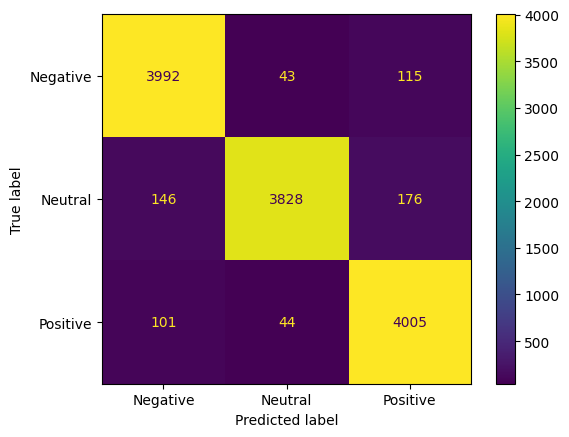

In [8]:
# Confusion Matrix Train RF
ConfusionMatrixDisplay.from_estimator(rf, X_train_rf, y_train_rf)

In [9]:
# Testing Model
rf_test_report = classification_report(y_test_rf, rf.predict(X_test_rf))
print(rf_test_report)

              precision    recall  f1-score   support

    Negative       0.52      0.63      0.57       885
     Neutral       0.44      0.42      0.43       927
    Positive       0.72      0.66      0.69      1749

    accuracy                           0.59      3561
   macro avg       0.56      0.57      0.56      3561
weighted avg       0.60      0.59      0.59      3561



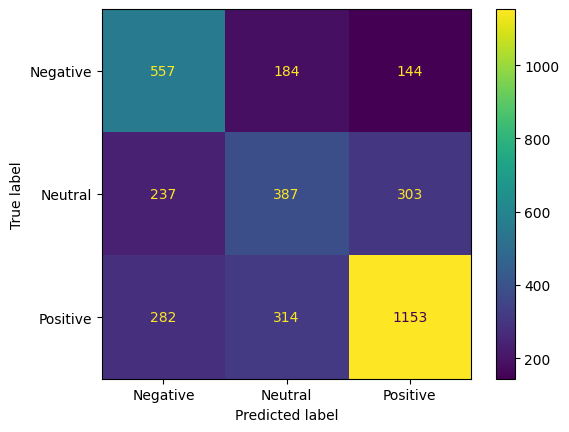

In [10]:
# Confusion Matrix Test Model RF
ConfusionMatrixDisplay.from_predictions(y_test_rf, rf.predict(X_test_rf))

In [11]:
# Hyper Params Tuning dengan Bayes Search
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_bayes = BayesSearchCV(estimator=rf, search_spaces=params, n_iter=30, cv=5)
rf_bayes.fit(X_train_rf, y_train_rf)

rf_bayes_best = rf_bayes.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [12]:
rf_bayes.score(X_train_rf, y_train_rf)

0.9497991967871486

In [15]:
print(rf_bayes_best)

RandomForestClassifier(max_features='log2', n_estimators=300)
